<a href="https://colab.research.google.com/github/shubhkhandare/Image-Classification-Using-Convolutional-Neural-Network-CNN-/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(image_train, label_train), (image_test,label_test) = datasets.cifar10.load_data()
image_train.shape


(50000, 32, 32, 3)

In [4]:
image_test.shape

(10000, 32, 32, 3)

In [5]:
label_train.shape


(50000, 1)

In [6]:
label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
label_train = label_train.reshape(-1,)
label_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
label_test = label_test.reshape(-1,)


In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [15]:
def sample_plot (image, label, index):
  plt.figure(figsize=(15,2))
  plt.imshow(image[index])
  plt.xlabel(classes[label[index]])

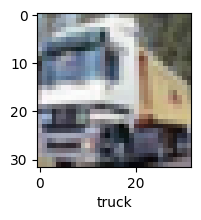

In [18]:
sample_plot(image_train, label_train, 1)

Normalizing the training data


In [19]:
image_train = image_train/255.0
image_test = image_test/255.0

convolutional neural network to train our images


In [26]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    #flatten
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='softmax')
])

In [29]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [30]:
cnn.fit(image_train, label_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 37ms/step - loss: 1.4916 - accuracy: 0.4655
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1112 - accuracy: 0.6103
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9758 - accuracy: 0.6621
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8924 - accuracy: 0.6894
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8218 - accuracy: 0.7141
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7628 - accuracy: 0.7333
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7158 - accuracy: 0.7512
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6658 - accuracy: 0.7662
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6260 - accuracy: 0.7810
Epoch 10/10
1563/1563 [==============================] - 67s 43m

In [31]:
cnn.evaluate(image_test, label_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9379 - accuracy: 0.6956


[0.9378795623779297, 0.6955999732017517]

In [32]:
y_pred = cnn.predict(image_test)


313/313 [==============================] - 4s 12ms/step


In [33]:
y_class = [np.argmax(element) for element in y_pred ]
y_class[:5]

[3, 8, 0, 0, 4]

In [34]:
label_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

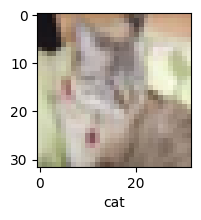

In [40]:
sample_plot(image_test, label_test,8)


In [39]:
classes[y_class[8]]

'cat'